In [18]:
import numpy as np
import pandas as pd
from mayavi import mlab
import matplotlib.pyplot as plt
import tarfile
from pathlib import Path
from tqdm.notebook import tqdm
from scipy.spatial.transform import Rotation
mlab.init_notebook()
%matplotlib inline

Notebook initialized with ipy backend.


In [3]:
# !curl ../data/bunny.tar.gz http://graphics.stanford.edu/pub/3Dscanrep/bunny.tar.gz

In [4]:
plyfile = "../data/bunny/reconstruction/bun_zipper.ply"

load ply file

In [5]:
vertex = np.zeros([35947, 5], dtype=float)
face = np.zeros([69451, 3], dtype=int)
with open(plyfile, "r") as f:
    while f.readline().strip() != "end_header":
        pass
    # vertex
    for i in range(35947):
        l = list(map(float, f.readline().strip().split()))
        vertex[i] = l
    # vertex
    for i in range(69451):
        l = list(map(int, f.readline().strip().split()))[1:]
        face[i] = l
vx, vy, vz = vertex[:, :3].T

https://mayavi.readthedocs.io/ja/latest/auto/mlab_camera.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.html
https://mayavi.readthedocs.io/ja/latest/auto/mlab_helper_functions.html#triangular_mesh

In [75]:
mlab.clf()
f = mlab.figure(bgcolor=(0, 0, 0), size=(64, 64))
# bunny = mlab.triangular_mesh(vz, vx, vy, face, color=(0.7,)*3)
bunny = mlab.triangular_mesh(vz, vx, vy, face, colormap="file")
mlab.view(azimuth=0, elevation=90, distance=0.4)
bunny

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00@\x00\x00\x00@\x08\x02\x00\x00\x00%\x0b\xe6\x89\x…

In [76]:
# z_list = np.linspace(-1, 1, 30)
# phi_list = np.linspace(0, 2*np.pi, 30)
# z, phi = np.meshgrid(z_list, phi_list)

In [77]:
n_data = 100
z = np.random.uniform(-1, 1, size=n_data)
phi = np.random.uniform(0, 2*np.pi, size=n_data)
r = np.sqrt(1 - z*z)
x, y = r*np.cos(phi), r*np.sin(phi)

In [78]:
img_list = np.empty([n_data, 64, 64, 3])

In [79]:
azi_deg, elv_deg = np.rad2deg(phi), np.rad2deg(np.arccos(z))

In [80]:
for i in range(n_data):
    mlab.view(azimuth=azi_deg[i], elevation=elv_deg[i], distance=0.5)
    img_list[i] = mlab.screenshot()

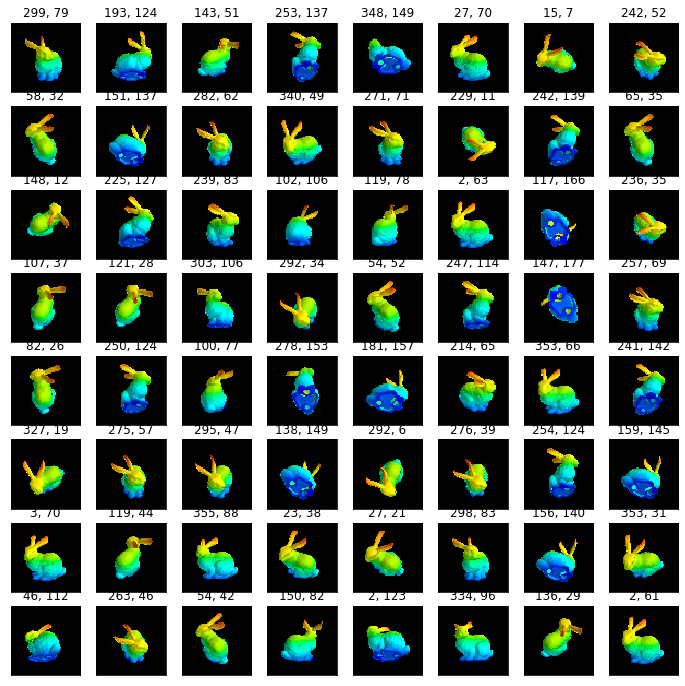

In [81]:
h, w = 8, 8
fig, axes = plt.subplots(h, w, figsize=(12, 12))
for i in range(h):
    for j in range(w):
        idx = i*w + j
        axes[i, j].set_title("{:.0f}, {:.0f}".format(azi_deg[idx], elv_deg[idx]))
        axes[i, j].imshow(img_list[idx]/255)
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

In [82]:
n_data = 50000
batch_size = 100
img_list = np.empty([n_data, 64, 64, 3])
z = np.random.uniform(-1, 1, size=n_data)
phi = np.random.uniform(0, 2*np.pi, size=n_data)
r = np.sqrt(1 - z*z)
x, y = r*np.cos(phi), r*np.sin(phi)

n_batch = n_data // batch_size
for i in tqdm(range(n_batch)):
    slc = slice(i*batch_size, (i+1)*batch_size)
    azi_deg, elv_deg = np.rad2deg(phi[slc]), np.rad2deg(np.arccos(z[slc]))
    for j in range(batch_size):
        mlab.view(azimuth=azi_deg[j], elevation=elv_deg[j], distance=0.5)
        img_list[i*batch_size+j] = mlab.screenshot()

### 白黒

In [33]:
# image_bw = img_list.mean(-1)
# elev = np.arccos(z)

In [35]:
# np.savez_compressed("../data/bunny_bw", images=image_bw, azimuth=phi, elevation=elev)

In [36]:
# np.savez_compressed("../data/bunny_bw5000", images=image_bw[:5000], azimuth=phi[:5000], elevation=elev[:5000])

In [37]:
# np.savez_compressed("../data/bunny_bw500", images=image_bw[:500], azimuth=phi[:500], elevation=elev[:500])

## カラー

In [83]:
elev = np.arccos(z)

In [85]:
np.savez_compressed("../data/bunny_cr50000", images=img_list, azimuth=phi, elevation=elev)

In [86]:
np.savez_compressed("../data/bunny_cr5000", images=img_list[:5000], azimuth=phi[:5000], elevation=elev[:5000])

In [87]:
np.savez_compressed("../data/bunny_cr500", images=img_list[:500], azimuth=phi[:500], elevation=elev[:500])